In [2]:
import os 
import pandas as pd
from pathlib import Path

In [ ]:

!pip install -q git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI
from pathlib import Path
import random
from typing import Any, Callable, List, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import io, transforms
import torchvision.transforms.functional as TF
from tqdm.auto import tqdm

%matplotlib inline

## dataloader

In [75]:
base_path = '/home/deebuls/Documents/phd/dataset/bop/lm'
train_dataset_path = 'train_pbr'
test_dataset_path = 'test'
per_scene_folder_name = ['depth', 'rgb']
camera_parameters = 'scene_camera.json'

In [81]:
os.listdir(os.path.join(base_path, train_dataset_path, '000001', 'rgb'))
os.path.join(base_path, 'coco_annotation', train_dataset_path ,'000001', 'scene_gt_coco.json')

'/home/deebuls/Documents/phd/dataset/bop/lm/coco_annotation/train_pbr/000001/scene_gt_coco.json'

In [83]:
scene_names = os.listdir(os.path.join(base_path, 'coco_annotation', train_dataset_path))



In [84]:

annotations = [COCO(os.path.join(base_path, 
                                 'coco_annotation', 
                                 train_dataset_path ,
                                 scene, 
                                 'scene_gt_coco.json'))  for scene in scene_names]

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
load

In [91]:
for a in annotations:
    print (a.loadImgs(a.getImgIds())[0]["file_name"])
    break

rgb/000000.jpg


In [ ]:
class ImageData(Dataset):
    def __init__(
        self, 
        annotations: COCO, 
        img_ids: List[int], 
        cat_ids: List[int], 
        root_path: Path, 
        transform: Optional[Callable]=None
    ) -> None:
        super().__init__()
        self.annotations = annotations
        self.img_data = annotations.loadImgs(img_ids)
        self.cat_ids = cat_ids
        #for img in self.img_data:
        #    print (img["file_name"])
        #    print (str(root_path +  '/' + img["file_name"]))
        self.files = [str(root_path +  '/' +  img["file_name"]) for img in self.img_data]
        self.transform = transform
        
    def __len__(self) -> int:
        return len(self.files)
    
    def __getitem__(self, i: int) -> Tuple[torch.Tensor, torch.LongTensor]:
        ann_ids = self.annotations.getAnnIds(
            imgIds=self.img_data[i]['id'], 
            catIds=self.cat_ids, 
            iscrowd=None
        )
        anns = self.annotations.loadAnns(ann_ids)
        mask = torch.LongTensor(np.max(np.stack([self.annotations.annToMask(ann) * ann["category_id"] 
                                                 for ann in anns]), axis=0)).unsqueeze(0)
        
        img = io.read_image(self.files[i])
        if img.shape[0] == 1:
            img = torch.cat([img]*3)
        
        if self.transform is not None:
            return self.transform(img, mask)
        
        return img, mask

## Test code

In [3]:
hope_dataset_dir = '/home/deebuls/Documents/phd/dataset/bop/hope'

directory = ['val', 'test']


In [12]:
sequence_names = os.listdir(os.path.join(hope_dataset_dir, 'val'))
for seq in sequence_names:
    print (list(Path(os.path.join(hope_dataset_dir, 'val', seq, 'rgb')).glob('*.png')))
    print (os.listdir(os.path.join(hope_dataset_dir, 'val', seq, 'rgb')))
     

[PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000001/rgb/000004.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000001/rgb/000001.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000001/rgb/000003.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000001/rgb/000000.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000001/rgb/000002.png')]
['000004.png', '000001.png', '000003.png', '000000.png', '000002.png']
[PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000010/rgb/000004.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000010/rgb/000001.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000010/rgb/000003.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000010/rgb/000000.png'), PosixPath('/home/deebuls/Documents/phd/dataset/bop/hope/val/000010/rgb/000002.png')]
['000004.png', '000001.png', '000003.png', '000000.png', '000002.png']
[Posix

In [7]:
from pathlib import Path

In [13]:
import json

In [48]:
coco_dataset = '/home/deebuls/Documents/phd/dataset/bop/lm/coco/test/000002/scene_gt_coco.json'
ROOT_PATH = '/home/deebuls/Documents/phd/dataset/bop/lm/test/000002'

In [18]:

with open(coco_dataset) as f:
    d = json.load(f)
    print(d.keys())

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


In [39]:
d['categories']

[{'id': 1, 'name': '1', 'supercategory': 'lmo'},
 {'id': 5, 'name': '5', 'supercategory': 'lmo'},
 {'id': 6, 'name': '6', 'supercategory': 'lmo'},
 {'id': 8, 'name': '8', 'supercategory': 'lmo'},
 {'id': 9, 'name': '9', 'supercategory': 'lmo'},
 {'id': 10, 'name': '10', 'supercategory': 'lmo'},
 {'id': 11, 'name': '11', 'supercategory': 'lmo'},
 {'id': 12, 'name': '12', 'supercategory': 'lmo'}]

In [26]:
d['annotations'][1]

{'id': 2,
 'image_id': 3,
 'category_id': 5,
 'iscrowd': 0,
 'area': 4165,
 'bbox': [376, 226, 61, 92],
 'segmentation': {'counts': [180760,
   11,
   447,
   36,
   11,
   2,
   427,
   43,
   5,
   9,
   416,
   51,
   3,
   12,
   410,
   56,
   1,
   14,
   407,
   74,
   404,
   76,
   402,
   60,
   1,
   18,
   400,
   61,
   1,
   19,
   398,
   60,
   3,
   19,
   397,
   60,
   3,
   20,
   397,
   60,
   1,
   1,
   1,
   21,
   395,
   61,
   3,
   21,
   395,
   12,
   6,
   43,
   3,
   21,
   394,
   11,
   4,
   3,
   1,
   44,
   3,
   20,
   394,
   64,
   2,
   20,
   394,
   63,
   3,
   20,
   394,
   63,
   4,
   19,
   394,
   63,
   4,
   19,
   393,
   64,
   5,
   17,
   394,
   65,
   5,
   16,
   394,
   66,
   5,
   14,
   395,
   66,
   6,
   12,
   396,
   68,
   6,
   9,
   397,
   70,
   7,
   3,
   400,
   70,
   411,
   71,
   409,
   80,
   400,
   80,
   400,
   80,
   400,
   80,
   400,
   80,
   401,
   79,
   401,
   79,
   401,
   79,
   401,
 

In [27]:
import torchvision.datasets as dset

In [33]:
#hide
!pip install -q git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI
from pathlib import Path
import random
from typing import Any, Callable, List, Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import io, transforms
import torchvision.transforms.functional as TF
from tqdm.auto import tqdm

%matplotlib inline

In [34]:
valid_annotations = COCO(coco_dataset)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [44]:

cat_ids = valid_annotations.getCatIds()
valid_img_ids = []
for cat in cat_ids:
    valid_img_ids.extend(valid_annotations.getImgIds(catIds=cat))
    
valid_img_ids = list(set(valid_img_ids))
print(f"Number of training images: {len(valid_img_ids)}")


Number of training images: 200


In [45]:
cat_ids

[1, 5, 6, 8, 9, 10, 11, 12]

In [47]:
valid_annotations.loadImgs(valid_img_ids)

[{'id': 3,
  'file_name': 'rgb/000003.png',
  'width': 640,
  'height': 480,
  'date_captured': '2021-10-05 15:31:00.366690',
  'license': 1,
  'coco_url': '',
  'flickr_url': ''},
 {'id': 8,
  'file_name': 'rgb/000008.png',
  'width': 640,
  'height': 480,
  'date_captured': '2021-10-05 15:31:00.952612',
  'license': 1,
  'coco_url': '',
  'flickr_url': ''},
 {'id': 521,
  'file_name': 'rgb/000521.png',
  'width': 640,
  'height': 480,
  'date_captured': '2021-10-05 15:31:32.807392',
  'license': 1,
  'coco_url': '',
  'flickr_url': ''},
 {'id': 1038,
  'file_name': 'rgb/001038.png',
  'width': 640,
  'height': 480,
  'date_captured': '2021-10-05 15:32:22.713043',
  'license': 1,
  'coco_url': '',
  'flickr_url': ''},
 {'id': 527,
  'file_name': 'rgb/000527.png',
  'width': 640,
  'height': 480,
  'date_captured': '2021-10-05 15:31:33.164086',
  'license': 1,
  'coco_url': '',
  'flickr_url': ''},
 {'id': 17,
  'file_name': 'rgb/000017.png',
  'width': 640,
  'height': 480,
  'date_ca

In [57]:
class ImageData(Dataset):
    def __init__(
        self, 
        annotations: COCO, 
        img_ids: List[int], 
        cat_ids: List[int], 
        root_path: Path, 
        transform: Optional[Callable]=None
    ) -> None:
        super().__init__()
        self.annotations = annotations
        self.img_data = annotations.loadImgs(img_ids)
        self.cat_ids = cat_ids
        #for img in self.img_data:
        #    print (img["file_name"])
        #    print (str(root_path +  '/' + img["file_name"]))
        self.files = [str(root_path +  '/' +  img["file_name"]) for img in self.img_data]
        self.transform = transform
        
    def __len__(self) -> int:
        return len(self.files)
    
    def __getitem__(self, i: int) -> Tuple[torch.Tensor, torch.LongTensor]:
        ann_ids = self.annotations.getAnnIds(
            imgIds=self.img_data[i]['id'], 
            catIds=self.cat_ids, 
            iscrowd=None
        )
        anns = self.annotations.loadAnns(ann_ids)
        mask = torch.LongTensor(np.max(np.stack([self.annotations.annToMask(ann) * ann["category_id"] 
                                                 for ann in anns]), axis=0)).unsqueeze(0)
        
        img = io.read_image(self.files[i])
        if img.shape[0] == 1:
            img = torch.cat([img]*3)
        
        if self.transform is not None:
            return self.transform(img, mask)
        
        return img, mask

In [59]:
valid_data = ImageData(valid_annotations, valid_img_ids, cat_ids, ROOT_PATH)


valid_dl = DataLoader(
    valid_data,
    32, 
    shuffle=False, 
    drop_last=False, 
    num_workers=4,
    pin_memory=True,
)

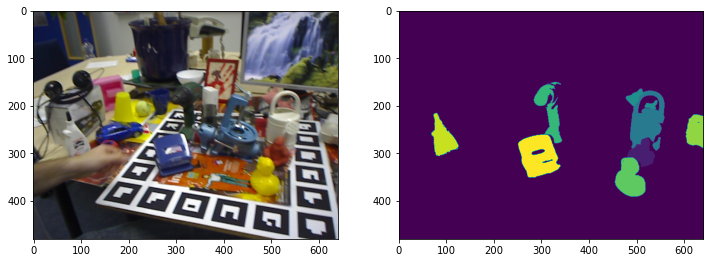

In [62]:
img, mask = valid_data[22]
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(TF.to_pil_image(img))
plt.subplot(122)
plt.imshow(mask.squeeze())
plt.show()

In [61]:
len(valid_data)

200

# Convert coco to yolo 

In [63]:
!pip install globox

In [64]:
from globox import AnnotationSet

In [67]:
coco_gts = AnnotationSet.from_coco(file_path=Path(coco_dataset))


Parsing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1514/1514 [00:00<00:00, 488964.06it/s]


In [68]:
coco_gts.show_stats()


Stats: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 520062.49it/s]


      Database Stats      
┏━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ Label ┃ Images ┃ Boxes ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 1     │    187 │   187 │
│ 10    │    190 │   190 │
│ 11    │    154 │   154 │
│ 12    │    200 │   200 │
│ 5     │    199 │   199 │
│ 6     │    196 │   196 │
│ 8     │    200 │   200 │
│ 9     │    188 │   188 │
├───────┼────────┼───────┤
│ Total │    200 │  1514 │
└───────┴────────┴───────┘

In [71]:
coco_gts.save_yolo(
    save_dir=Path("lm_yolo_train"), 
    label_to_id={"background": 0, "1": 1, "2": 2, "3": 3, 
                 "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, 
                 "9": 9, "10": 10, "11": 11, "12": 12})

Saving:   0%|          | 0/200 [00:00<?, ?it/s]